In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('cars.csv')

In [4]:
df.sample(3)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
558372,Nissan,Frontier SV,2019,60803.0,4.0L V6 24V MPFI DOHC,5-Speed Automatic,Four-wheel Drive,Gasoline,15-21,Gun Metallic,Wheat,0.0,1.0,1.0,Legacy Nissan,NaN,4.7,123.0,303.0,27822.0
143029,Chevrolet,Colorado ZR2,2021,20099.0,3.6L V6 24V GDI DOHC,8-Speed Automatic,Four-wheel Drive,Gasoline,16-18,Cherry Red Tintcoat,Black,0.0,1.0,1.0,Carr Chevrolet,4.6,4.7,46.0,NaN,44450.0
412550,Jeep,Wrangler Rubicon,2021,750.0,3.6L V6 24V MPFI DOHC,8-Speed Automatic,Four-wheel Drive,Gasoline,17-25,Limited Edition Gecko Clear,Dark Saddle / Black,0.0,0.0,0.0,21st Century Auto Sales,NaN,4.8,31.0,NaN,45762.0


### Now as per the analysis from last trial, we need to seprate the data into differnet manufacturers

In [5]:
df['manufacturer'].unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hyundai', 'INFINITI',
       'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Porsche', 'RAM',
       'Subaru', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [6]:
df[df['manufacturer'] == 'Acura'].sample(3)

,manufacturer,model,year,mileage,engine,transmission,drivetrain,fuel_type,mpg,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_name,seller_rating,driver_rating,driver_reviews_num,price_drop,price
1017,Acura,ILX Technology Package,2021,36218.0,2.4L I4 16V GDI DOHC,8-Speed Automatic with Auto-Shift,Front-wheel Drive,Gasoline,24-34,Majestic Black Pearl,Ebony,0.0,1.0,1.0,Honda City Chicago,4.7,4.9,3.0,200.0,26795.0
3546,Acura,RDX Technology Package,2019,39829.0,2.0L I4 16V GDI DOHC Turbo,10-Speed Automatic,Front-wheel Drive,Gasoline,22-28,Lunar Silver Metallic,Graystone,0.0,1.0,1.0,Sewell Lexus of Fort Worth,3.0,4.3,220.0,NaN,34895.0
2134,Acura,RDX,2019,31860.0,NaN,10 Speed Automatic,NaN,NaN,NaN,Lunar Silver Metallic,Ebony,0.0,1.0,1.0,Smithtown Acura,4.7,4.3,220.0,1330.0,30668.0


In [7]:
man_lst = df['manufacturer'].unique()

for m in man_lst:
    df_m= df[df['manufacturer'] == m]

    globals()[f'df_{m}'] = df_m

    print(f'df for manufacturer {m} saved as df_{m}')


df for manufacturer Acura saved as df_Acura
df for manufacturer Audi saved as df_Audi
df for manufacturer BMW saved as df_BMW
df for manufacturer Buick saved as df_Buick
df for manufacturer Cadillac saved as df_Cadillac
df for manufacturer Chevrolet saved as df_Chevrolet
df for manufacturer Chrysler saved as df_Chrysler
df for manufacturer Dodge saved as df_Dodge
df for manufacturer Ford saved as df_Ford
df for manufacturer GMC saved as df_GMC
df for manufacturer Honda saved as df_Honda
df for manufacturer Hyundai saved as df_Hyundai
df for manufacturer INFINITI saved as df_INFINITI
df for manufacturer Jaguar saved as df_Jaguar
df for manufacturer Jeep saved as df_Jeep
df for manufacturer Kia saved as df_Kia
df for manufacturer Land Rover saved as df_Land Rover
df for manufacturer Lexus saved as df_Lexus
df for manufacturer Lincoln saved as df_Lincoln
df for manufacturer Mazda saved as df_Mazda
df for manufacturer Mercedes-Benz saved as df_Mercedes-Benz
df for manufacturer Mitsubishi s

In [8]:
df_Ford.shape

(79526, 20)

### Let's start with ford as it is having the largest numbers of record in the whole dataset, we were able to get the a seprate dataframe for, now we can anlyse the `missing values`, `outliers`, observe and handle them properly.

In [9]:
df = df_Ford

In [10]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Combine the two DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

combined_df

,Feature,Unique Values,Missing Values
0,manufacturer,1,0
1,model,1156,0
2,year,92,0
3,mileage,58525,38
4,engine,1155,200
5,transmission,386,720
6,drivetrain,10,2341
7,fuel_type,13,3603
8,mpg,341,21568
9,exterior_color,1163,1482


In [11]:
## To analyse some underlying patterns from the string features, we'll create word cloud, what are the trends in the dataset

In [15]:
# Combine all the single words in 'product_name' column into one string
text_model = ' '.join(df['model'].dropna()) 
# text_year = ' '.join(df['year'].dropna())
text_engine = ' '.join(df['engine'].dropna())
text_transmission = ' '.join(df['transmission'].dropna())
text_mpg = ' '.join(df['mpg'].dropna())
text_exterior_color = ' '.join(df['exterior_color'].dropna())
text_interior_color = ' '.join(df['interior_color'].dropna())
text_seller_name = ' '.join(df['seller_name'].dropna())
# text_price = ' '.join(df['price'].dropna())

# Model

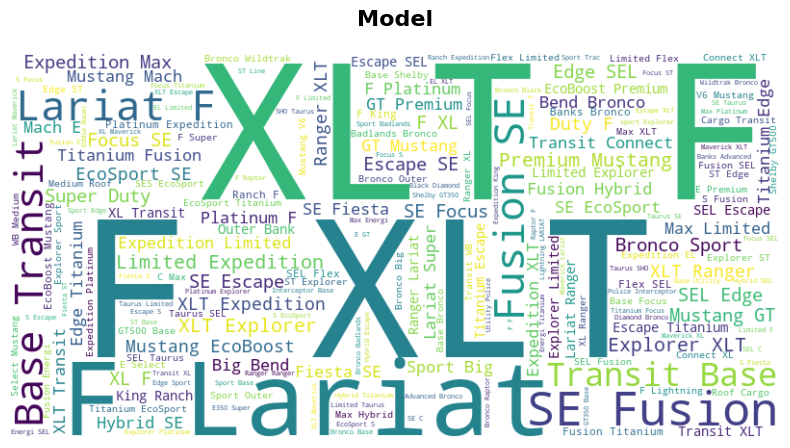

In [19]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_model)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("Model", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

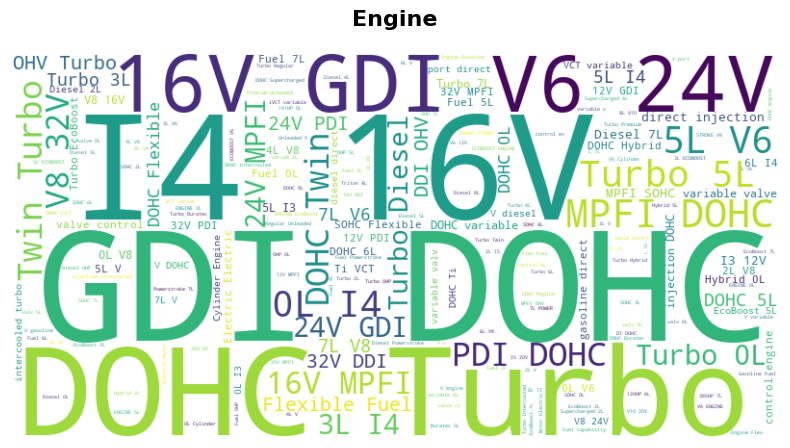

In [20]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_engine)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("Engine", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

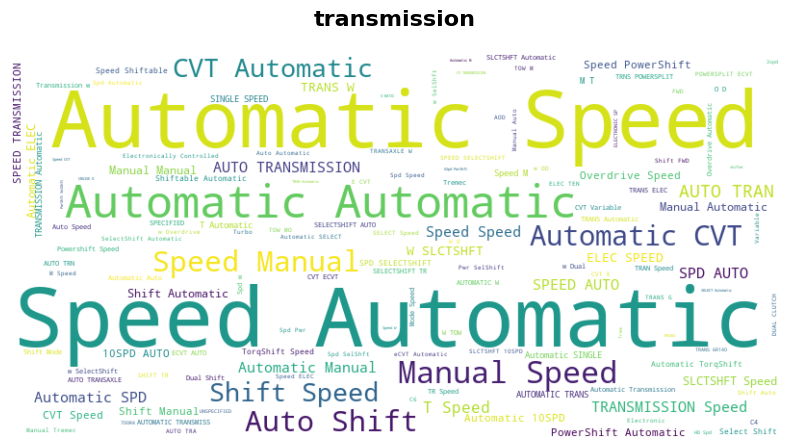

In [ ]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_transmission)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("transmission", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

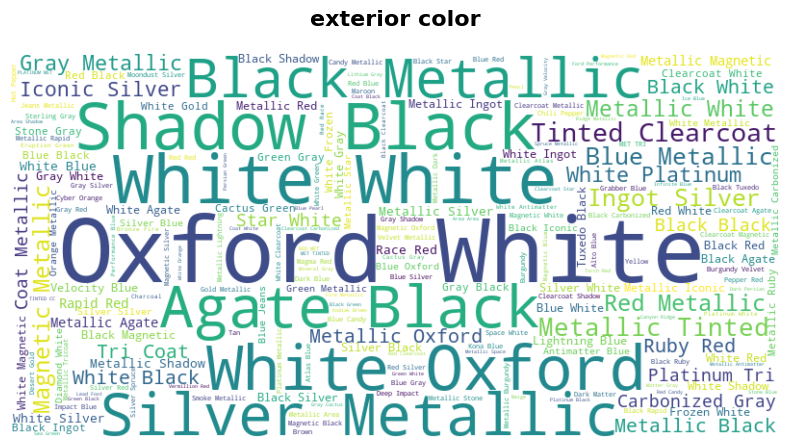

In [25]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_exterior_color)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("exterior color", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

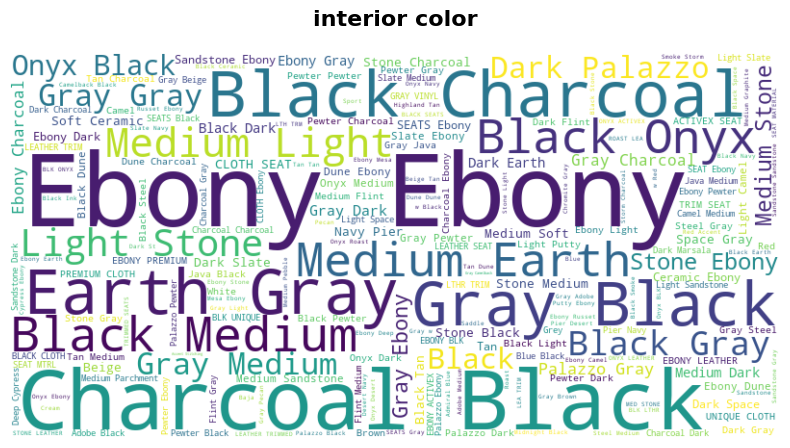

In [28]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_interior_color)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("interior color", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()

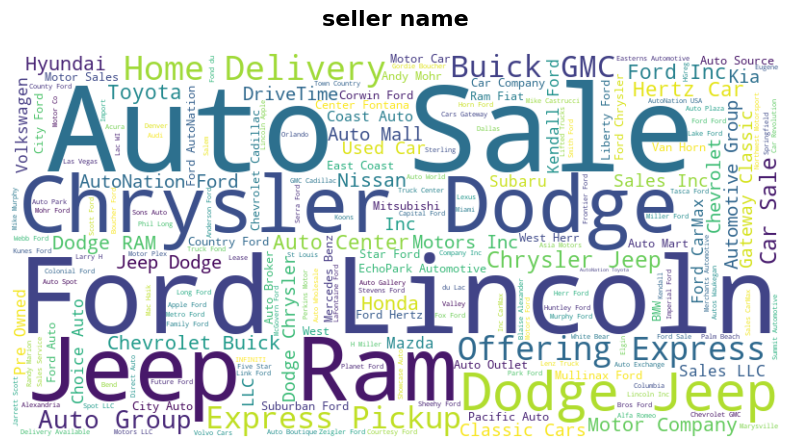

In [29]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_seller_name)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes

# ✅ Add a title to the plot
plt.title("seller name", fontsize=16, fontweight='bold', pad=20)

# Show the plot
plt.show()